In [ ]:
import os
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from torchvision.models import vit_b_16, ViT_B_16_Weights
import matplotlib.pyplot as plt
from tqdm import tqdm

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

batch_size = 128
num_epochs = 20
learning_rate = 1e-4
weight_decay = 1e-4


transform_train = transforms.Compose([
    transforms.RandomCrop(32, padding=4),
    transforms.RandomHorizontalFlip(),
    transforms.Resize(224),  
    transforms.ToTensor(),
    transforms.Normalize((0.5071, 0.4867, 0.4408), (0.2675, 0.2565, 0.2761))
])

transform_test = transforms.Compose([
    transforms.Resize(224),  
    transforms.ToTensor(),
    transforms.Normalize((0.5071, 0.4867, 0.4408), (0.2675, 0.2565, 0.2761))
])

In [ ]:
train_dataset = datasets.CIFAR100(
    root='./data', 
    train=True, 
    download=True, 
    transform=transform_train
)

test_dataset = datasets.CIFAR100(
    root='./data', 
    train=False, 
    download=True, 
    transform=transform_test
)

train_loader = DataLoader(
    train_dataset, 
    batch_size=batch_size, 
    shuffle=True, 
    num_workers=4
)

test_loader = DataLoader(
    test_dataset, 
    batch_size=batch_size, 
    shuffle=False, 
    num_workers=4
)

In [ ]:
model = vit_b_16(weights=ViT_B_16_Weights.IMAGENET1K_V1)


num_classes = 100
in_features = model.heads.head.in_features
model.heads.head = nn.Linear(in_features, num_classes)


model = model.to(device)


criterion = nn.CrossEntropyLoss()
optimizer = optim.AdamW(model.parameters(), lr=learning_rate, weight_decay=weight_decay)


scheduler = optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=num_epochs)


/environment/miniconda3/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Using device: cuda
Files already downloaded and verified
Files already downloaded and verified


Testing: 100%|██████████| 79/79 [00:12<00:00,  6.24it/s, loss=0.61, acc=82.4] 


Saving best model with accuracy: 82.38%
Epoch: 1/20
Train Loss: 1.0879 | Train Acc: 73.60%
Test Loss: 0.6096 | Test Acc: 82.38%
----------------------------------------------------------------------


Testing: 100%|██████████| 79/79 [00:12<00:00,  6.23it/s, loss=0.555, acc=83.3]


Saving best model with accuracy: 83.30%
Epoch: 2/20
Train Loss: 0.4330 | Train Acc: 87.13%
Test Loss: 0.5548 | Test Acc: 83.30%
----------------------------------------------------------------------


Testing: 100%|██████████| 79/79 [00:12<00:00,  6.23it/s, loss=0.501, acc=84.9]


Saving best model with accuracy: 84.92%
Epoch: 3/20
Train Loss: 0.2998 | Train Acc: 90.77%
Test Loss: 0.5009 | Test Acc: 84.92%
----------------------------------------------------------------------


Testing: 100%|██████████| 79/79 [00:12<00:00,  6.25it/s, loss=0.495, acc=86.2]


Saving best model with accuracy: 86.23%
Epoch: 4/20
Train Loss: 0.2158 | Train Acc: 93.15%
Test Loss: 0.4955 | Test Acc: 86.23%
----------------------------------------------------------------------


Testing: 100%|██████████| 79/79 [00:12<00:00,  6.25it/s, loss=0.514, acc=85.9]


Epoch: 5/20
Train Loss: 0.1483 | Train Acc: 95.22%
Test Loss: 0.5140 | Test Acc: 85.90%
----------------------------------------------------------------------


Testing: 100%|██████████| 79/79 [00:12<00:00,  6.23it/s, loss=0.54, acc=85.8] 


Epoch: 6/20
Train Loss: 0.1222 | Train Acc: 96.19%
Test Loss: 0.5401 | Test Acc: 85.76%
----------------------------------------------------------------------


Testing: 100%|██████████| 79/79 [00:12<00:00,  6.23it/s, loss=0.553, acc=85.9]


Epoch: 7/20
Train Loss: 0.0903 | Train Acc: 97.12%
Test Loss: 0.5529 | Test Acc: 85.92%
----------------------------------------------------------------------


Testing: 100%|██████████| 79/79 [00:12<00:00,  6.23it/s, loss=0.529, acc=86.5]


Saving best model with accuracy: 86.46%
Epoch: 8/20
Train Loss: 0.0700 | Train Acc: 97.78%
Test Loss: 0.5295 | Test Acc: 86.46%
----------------------------------------------------------------------


Testing: 100%|██████████| 79/79 [00:12<00:00,  6.25it/s, loss=0.518, acc=87.3]


Saving best model with accuracy: 87.30%
Epoch: 9/20
Train Loss: 0.0512 | Train Acc: 98.46%
Test Loss: 0.5181 | Test Acc: 87.30%
----------------------------------------------------------------------


Testing: 100%|██████████| 79/79 [00:12<00:00,  6.23it/s, loss=0.555, acc=87]  


Epoch: 10/20
Train Loss: 0.0358 | Train Acc: 98.88%
Test Loss: 0.5553 | Test Acc: 87.03%
----------------------------------------------------------------------


Testing: 100%|██████████| 79/79 [00:12<00:00,  6.25it/s, loss=0.554, acc=87.5]


Saving best model with accuracy: 87.51%
Epoch: 11/20
Train Loss: 0.0250 | Train Acc: 99.25%
Test Loss: 0.5539 | Test Acc: 87.51%
----------------------------------------------------------------------


Testing: 100%|██████████| 79/79 [00:12<00:00,  6.21it/s, loss=0.56, acc=87.4] 


Epoch: 12/20
Train Loss: 0.0177 | Train Acc: 99.46%
Test Loss: 0.5597 | Test Acc: 87.43%
----------------------------------------------------------------------


Testing: 100%|██████████| 79/79 [00:12<00:00,  6.24it/s, loss=0.549, acc=88]  


Saving best model with accuracy: 88.01%
Epoch: 13/20
Train Loss: 0.0129 | Train Acc: 99.64%
Test Loss: 0.5490 | Test Acc: 88.01%
----------------------------------------------------------------------


Testing: 100%|██████████| 79/79 [00:12<00:00,  6.24it/s, loss=0.552, acc=88.2]


Saving best model with accuracy: 88.16%
Epoch: 14/20
Train Loss: 0.0087 | Train Acc: 99.77%
Test Loss: 0.5523 | Test Acc: 88.16%
----------------------------------------------------------------------


Testing: 100%|██████████| 79/79 [00:12<00:00,  6.24it/s, loss=0.559, acc=88.4]


Saving best model with accuracy: 88.38%
Epoch: 15/20
Train Loss: 0.0058 | Train Acc: 99.84%
Test Loss: 0.5591 | Test Acc: 88.38%
----------------------------------------------------------------------


Testing: 100%|██████████| 79/79 [00:12<00:00,  6.25it/s, loss=0.56, acc=88.3] 


Epoch: 16/20
Train Loss: 0.0042 | Train Acc: 99.87%
Test Loss: 0.5600 | Test Acc: 88.34%
----------------------------------------------------------------------


Testing: 100%|██████████| 79/79 [00:12<00:00,  6.24it/s, loss=0.549, acc=88.8]


Saving best model with accuracy: 88.78%
Epoch: 17/20
Train Loss: 0.0030 | Train Acc: 99.92%
Test Loss: 0.5491 | Test Acc: 88.78%
----------------------------------------------------------------------


Testing: 100%|██████████| 79/79 [00:12<00:00,  6.22it/s, loss=0.548, acc=89.2]


Saving best model with accuracy: 89.15%
Epoch: 18/20
Train Loss: 0.0020 | Train Acc: 99.96%
Test Loss: 0.5478 | Test Acc: 89.15%
----------------------------------------------------------------------


Testing: 100%|██████████| 79/79 [00:12<00:00,  6.23it/s, loss=0.548, acc=89]  


Epoch: 19/20
Train Loss: 0.0019 | Train Acc: 99.95%
Test Loss: 0.5480 | Test Acc: 89.04%
----------------------------------------------------------------------


Testing: 100%|██████████| 79/79 [00:12<00:00,  6.26it/s, loss=0.548, acc=89]  


Epoch: 20/20
Train Loss: 0.0019 | Train Acc: 99.94%
Test Loss: 0.5476 | Test Acc: 88.95%
----------------------------------------------------------------------


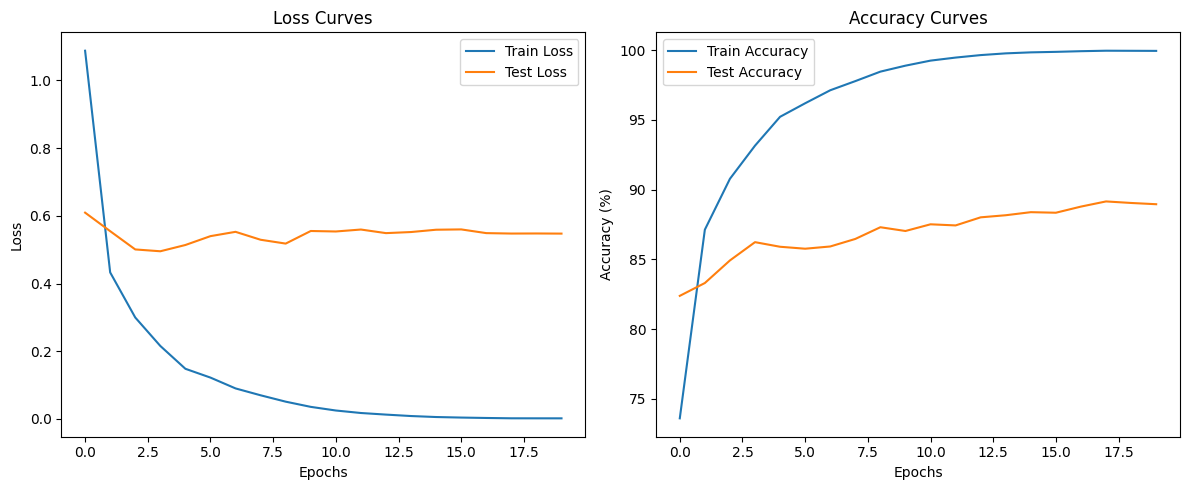

Final Evaluation: 100%|██████████| 79/79 [00:12<00:00,  6.31it/s]

Best model accuracy on test set: 89.15%


In [ ]:
train_losses = []
test_losses = []
train_accs = []
test_accs = []


best_model_path = 'best_vit_cifar100.pth'
best_acc = 0.0


def train(epoch):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0
    
    progress_bar = tqdm(train_loader, desc=f'Epoch {epoch+1}/{num_epochs}')
    for batch_idx, (inputs, targets) in enumerate(progress_bar):
        inputs, targets = inputs.to(device), targets.to(device)
        

        optimizer.zero_grad()
        

        outputs = model(inputs)
        loss = criterion(outputs, targets)
        

        loss.backward()
        optimizer.step()
        

        running_loss += loss.item()
        _, predicted = outputs.max(1)
        total += targets.size(0)
        correct += predicted.eq(targets).sum().item()
        

        progress_bar.set_postfix({
            'loss': running_loss/(batch_idx+1), 
            'acc': 100.*correct/total
        })
    
    train_loss = running_loss/len(train_loader)
    train_acc = 100.*correct/total
    
    train_losses.append(train_loss)
    train_accs.append(train_acc)
    
    return train_loss, train_acc


def test(epoch):
    global best_acc
    model.eval()
    running_loss = 0.0
    correct = 0
    total = 0
    
    with torch.no_grad():
        progress_bar = tqdm(test_loader, desc='Testing')
        for batch_idx, (inputs, targets) in enumerate(progress_bar):
            inputs, targets = inputs.to(device), targets.to(device)
            

            outputs = model(inputs)
            loss = criterion(outputs, targets)
            

            running_loss += loss.item()
            _, predicted = outputs.max(1)
            total += targets.size(0)
            correct += predicted.eq(targets).sum().item()
            

            progress_bar.set_postfix({
                'loss': running_loss/(batch_idx+1), 
                'acc': 100.*correct/total
            })
    
    test_loss = running_loss/len(test_loader)
    test_acc = 100.*correct/total
    
    test_losses.append(test_loss)
    test_accs.append(test_acc)
    

    if test_acc > best_acc:
        print(f'Saving best model with accuracy: {test_acc:.2f}%')
        best_acc = test_acc
        torch.save(model.state_dict(), best_model_path)
    
    return test_loss, test_acc


for epoch in range(num_epochs):
    train_loss, train_acc = train(epoch)
    test_loss, test_acc = test(epoch)
    

    scheduler.step()
    
    print(f'Epoch: {epoch+1}/{num_epochs}')
    print(f'Train Loss: {train_loss:.4f} | Train Acc: {train_acc:.2f}%')
    print(f'Test Loss: {test_loss:.4f} | Test Acc: {test_acc:.2f}%')
    print('-' * 70)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Train Loss')
plt.plot(test_losses, label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss Curves')

plt.subplot(1, 2, 2)
plt.plot(train_accs, label='Train Accuracy')
plt.plot(test_accs, label='Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.legend()
plt.title('Accuracy Curves')

plt.tight_layout()
plt.savefig('vit_cifar100_training_curves.png')
plt.show()

model.load_state_dict(torch.load(best_model_path))
model.eval()

correct = 0
total = 0

with torch.no_grad():
    for inputs, targets in tqdm(test_loader, desc='Final Evaluation'):
        inputs, targets = inputs.to(device), targets.to(device)
        outputs = model(inputs)
        _, predicted = outputs.max(1)
        total += targets.size(0)
        correct += predicted.eq(targets).sum().item()

print(f'Best model accuracy on test set: {100.*correct/total:.2f}%')